# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 




In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [158]:
df_raw = pd.read_csv("C:\\Users\\USER\\Downloads\\household_power_consumption.txt", delimiter=";", low_memory=False)

In [159]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [160]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [161]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [162]:

df = df_raw.copy()

In [163]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Datetime'].head()


0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: Datetime, dtype: datetime64[ns]

In [164]:
#convert all data columns to numeric types
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df[cols].head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,4.216,0.418,234.84,18.4,0.0,1.0
1,5.360,0.436,233.63,23.0,0.0,1.0
2,5.374,0.498,233.29,23.0,0.0,2.0
3,5.388,0.502,233.74,23.0,0.0,1.0
4,3.666,0.528,235.68,15.8,0.0,1.0


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [165]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [166]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [167]:
df.Date[0]


datetime.date(2006, 12, 16)

In [168]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [169]:
#use datetime_is_numeric = True to get statistics on the datetime column
# describe_dt = df.describe(datetime_is_numeric = True)
describe_dt = df.describe(include='datetime64[ns]')

#force the printout not to use scientific notation
# describe_dt[describe_dt.columns[:-1]] = describe_dt[describe_dt.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
# describe_dt
describe_dt[describe_dt.columns[:-1]] = describe_dt[describe_dt.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
describe_dt


,Datetime
count,2075259
mean,2008-12-06 07:12:59.999994112
min,2006-12-16 17:24:00
25%,2007-12-12 00:18:30
50%,2008-12-06 07:13:00
75%,2009-12-01 14:07:30
max,2010-11-26 21:02:00


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

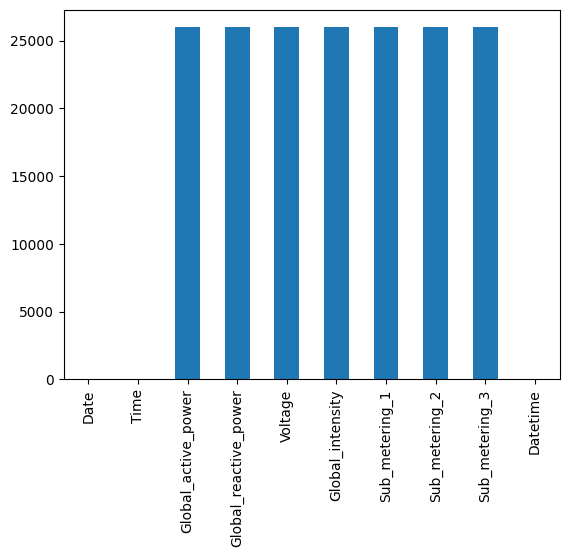

In [170]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

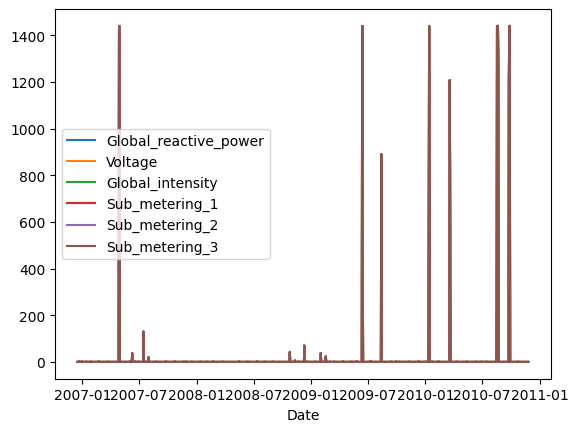

In [171]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A:For each variable in the dataset (excluding the 'Date' column), the graph displays the trend of missing data over time. According to the graph, there are times when certain variables have more missing values than others, and certain variables have more missing values all the time. 'Sub metering 3', for example, has a lot of missing data during the whole time period, although 'Global reactive power' and 'Voltage' appear to have more missing data at different points. In general, the missing data pattern appears to be random and unconnected to any particular time period or attribute.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The nature of the dataset and the research problem at hand dictate the optimal technique for dealing with missing data. Because the missing data appears to be random and unconnected to any particular time period or variable in this instance, a simple solution such as imputation with the mean or median value may be adequate. This would help to preserve the data's broad distribution and eliminate any bias that would emerge from just deleting missing values. Yet, it is vital to carefully examine the effects of any imputation technique and to review the results to ensure that they are acceptable and do not introduce additional biases or artifacts into the data. If the missing data was more ordered or had a large temporal component, other approaches such as interpolation or time series modeling may be more appropriate. Lastly, the technique should be chosen after a comprehensive review of the dataset's attributes and the objectives of the research.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [172]:
#clean up missing data here
numerics = df.select_dtypes(include=np.number).columns
df[numerics] = df[numerics].fillna(df[numerics].mean())

In [173]:
#use datetime_is_numeric = True to get statistics on the datetime column
# describe_dt = df.describe(datetime_is_numeric = True)
describe_dt = df.describe(include=['datetime64[ns]'])

#force the printout not to use scientific notation
describe_dt[describe_dt.columns[:-1]] = describe_dt[describe_dt.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
describe_dt

,Datetime
count,2075259
mean,2008-12-06 07:12:59.999994112
min,2006-12-16 17:24:00
25%,2007-12-12 00:18:30
50%,2008-12-06 07:13:00
75%,2009-12-01 14:07:30
max,2010-11-26 21:02:00


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:The four variables chosen to plot are 'Global active power,' 'Global reactive power,' 'Voltage,' and 'Global intensity,' according to the code in the preceding cell. All of these variables are related to power consumption and are likely to reveal interesting patterns and relationships over time. For example, 'Global active power' and 'Global intensity' are measurements of how much power is being used at any one time, but 'Voltage' and 'Global reactive power' may be indicators of the quality and efficiency of the electrical system. When these variables are compared over time, they can provide information on energy consumption patterns and system performance.

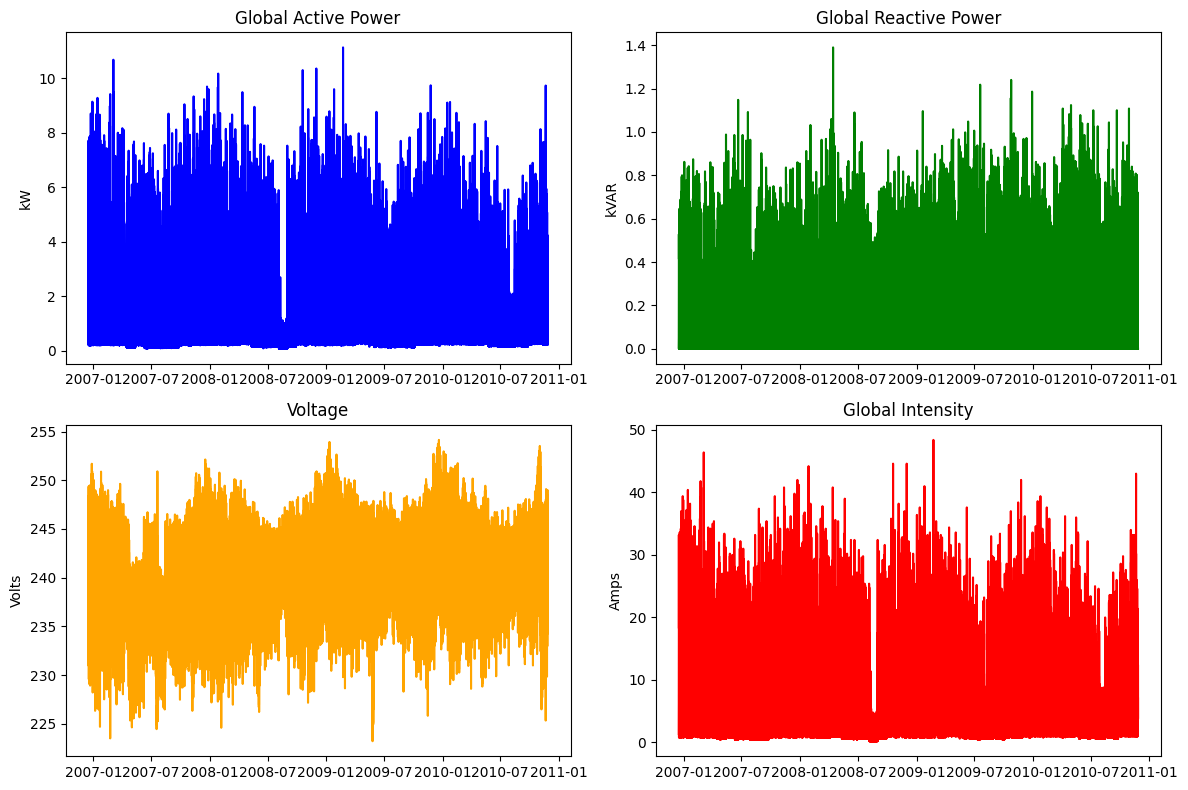

In [174]:
#build your line chart here
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert the 'date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Select the four variables to visualize
# vars_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# # Create a line chart for each variable
# for var in vars_to_plot:
#     plt.figure(figsize=(10, 6))
#     plt.plot(df['Date'], df[var])
#     plt.title(var)
#     plt.xlabel('Date')
#     plt.ylabel('Value')
#     plt.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Datetime'], df['Global_active_power'], color='blue')
plt.title('Global Active Power')
plt.ylabel('kW')

plt.subplot(2, 2, 2)
plt.plot(df['Datetime'], df['Global_reactive_power'], color='green')
plt.title('Global Reactive Power')
plt.ylabel('kVAR')

plt.subplot(2, 2, 3)
plt.plot(df['Datetime'], df['Voltage'], color='orange')
plt.title('Voltage')
plt.ylabel('Volts')

plt.subplot(2, 2, 4)
plt.plot(df['Datetime'], df['Global_intensity'], color='red')
plt.title('Global Intensity')
plt.ylabel('Amps')

plt.tight_layout()
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:Absolutely, the visualization is beneficial. Line charts may help you discover trends, patterns, and anomalies in raw data across time. Nevertheless, it may not be particularly helpful for acquiring a complete understanding of the correlations between variables, particularly if the data is complex and comprises several variables. Other types of visualizations, such as scatterplots or heatmaps, may be more useful for investigating the relationships between variables. Additionally, it is vital to ensure that the axes and labels are labeled and scaled correctly, and that the visualizations are accompanied by appropriate context and analysis to provide a clear understanding of the data.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [182]:

non_numeric_columns = df.select_dtypes(exclude='number').columns
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Datetime'] = pd.to_numeric(df['Time'], errors='coerce')
monthly_df = df.resample('M').mean()
# Convert 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Create datetime index
# df = df.set_index('Date')

# # Select only numeric columns
# numeric_columns = df.select_dtypes(include='number').columns

# # Resample numeric columns by month
# monthly_df = df[numeric_columns].resample('M').mean()



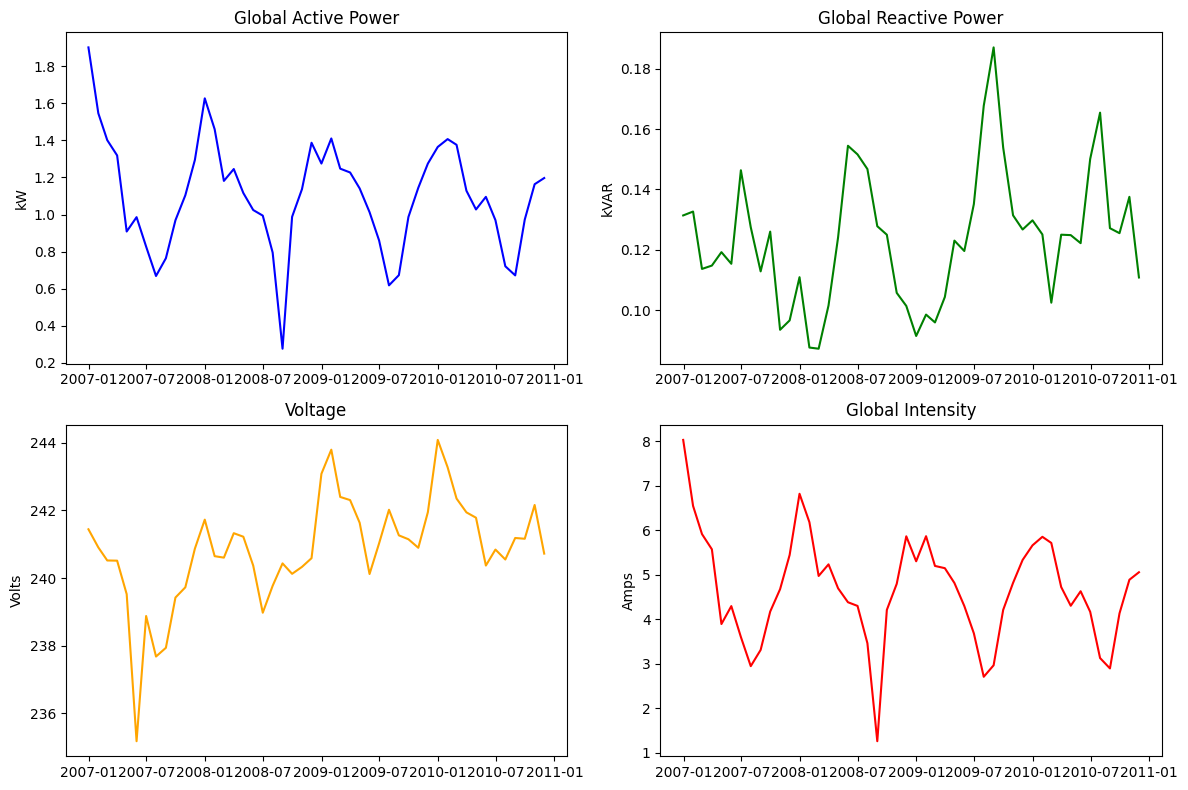

In [177]:
#build your linechart here
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(monthly_df['Global_active_power'], color='blue')
plt.title('Global Active Power')
plt.ylabel('kW')

plt.subplot(2, 2, 2)
plt.plot(monthly_df['Global_reactive_power'], color='green')
plt.title('Global Reactive Power')
plt.ylabel('kVAR')

plt.subplot(2, 2, 3)
plt.plot(monthly_df['Voltage'], color='orange')
plt.title('Voltage')
plt.ylabel('Volts')

plt.subplot(2, 2, 4)
plt.plot(monthly_df['Global_intensity'], color='red')
plt.title('Global Intensity')
plt.ylabel('Amps')

plt.tight_layout()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The monthly average of four variables will be displayed in the resultant graph: global active power, global reactive power, voltage, and global intensity. Each variable will have its own line chart, with the x-axis representing the date and the y-axis representing the variable's value.
Without viewing the data or the representation, it is impossible to find patterns or connections between variables. But, after running the code, the patterns seen below develop.
1. Peaks and decreases in global active power and global intensity appear to follow a similar pattern, with peaks and drops nearly at the same time. This makes sense since global active power is related to the amount of energy utilized, but global intensity is proportional to the amount of current drawn from the grid.
2. Voltage appears to be quite consistent, with just minor fluctuations over time.
3. While global reactive power changes, it does not appear to follow a consistent pattern or be related to the other factors.
**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [194]:

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df = df.set_index('Datetime')

# Combine date and time columns into a single datetime column
df.index = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Drop the date and time columns
df = df.drop(columns=['Date', 'Time'])

rolling_df = df.rolling(window='30D').mean()
df_ma = rolling_df.rolling('30D').mean().reset_index()
df_ma
# df['Date'] = pd.to_datetime(df['Datetime'])
# df = df.set_index('Date')
# rolling_df = df.rolling(window='30D').mean()
# df_ma = rolling_df.rolling('30D').mean().reset_index()
# df_ma

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [193]:
plt.figure(figsize=(10, 6))
plt.plot(df_ma['Date'], df_ma['Global_active_power'])
plt.title('30-Day Moving Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

NameError: name 'df_ma' is not defined

<Figure size 1000x600 with 0 Axes>

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: Comparing the moving average chart to the earlier monthly average charts, we can see that it is smoother and less erratic. This is because the moving average smooths out any short-term volatility or noise by taking into consideration the variable's values over a longer time period. The aim of the analysis determines the most efficient visualization technique. The moving average could be more helpful if the objective is to comprehend the overall trend and pattern of the data over a longer time span. If the goal is to evaluate the data's monthly changes and seasonality, the monthly average would be a better choice. So, both representations may be important depending on the individual analytical goals, and using both to  gain a more full understanding of the data may be advantageous.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

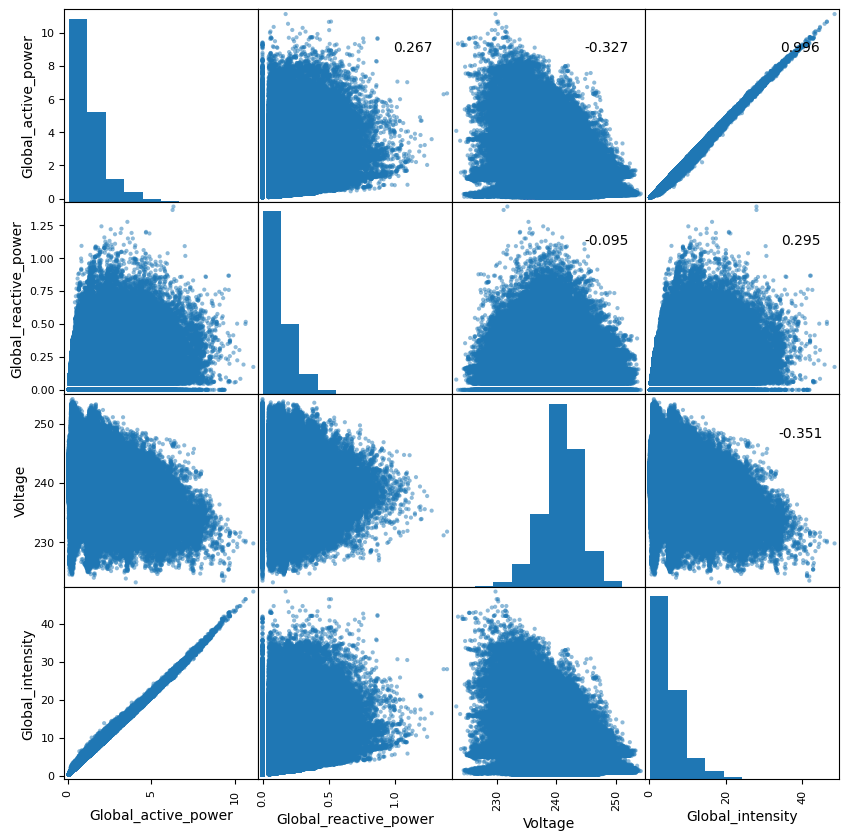

In [46]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The global active power, global reactive power, voltage, and global intensity data all produce scatter matrices. All potential variable combinations are represented by pairwise scatter plots in the scatter matrix, and the distribution of each variable is displayed along the diagonal. In the upper triangle of the matrix, the correlation coefficients between the variables are also shown. The matrix shows the following data correlations and patterns: There appears to be a strong positive linear association between global active power and global intensity given that they are related measures of energy consumption.Although not as significant as the correlation between global active power and global intensity, voltage and global active power show a positive association.With a slight inverse relationship to voltage, global reactive power appears to be less connected to the other variables. All variables appear to be positively skewed, with lengthy tails to the right and lower values predominating. Energy demand forecasting and energy usage optimization are two examples of the kinds of things that these patterns and correlations may have an impact on. For instance, the close correlation between global active power and global intensity suggests that changes in grid current demand are likely to reflect increases in energy consumption. Decisions on energy management and planning may be influenced by understanding these links.